In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("stock_data.csv", parse_dates=True, index_col = "Date")
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [226]:
df.index.dtype

dtype('<M8[ns]')

In [47]:
df

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...
2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA


<AxesSubplot:xlabel='Date'>

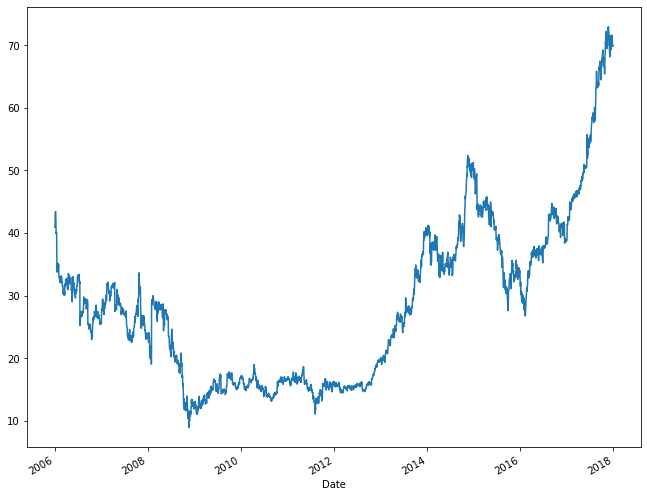

In [227]:
df['Close'].plot()

<AxesSubplot:xlabel='Date'>

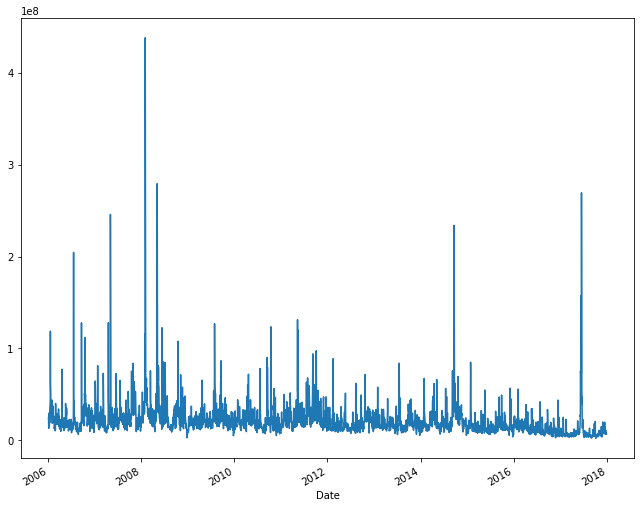

In [228]:
df['Volume'].plot()

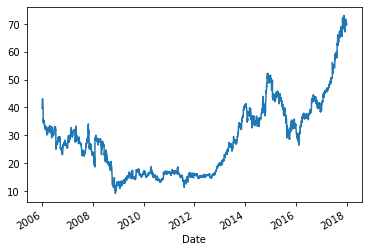

In [32]:
df['Open'].plot()
plt.show()

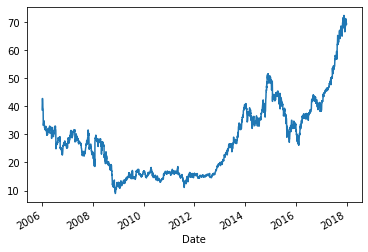

In [34]:
df['Low'].plot()
plt.show()

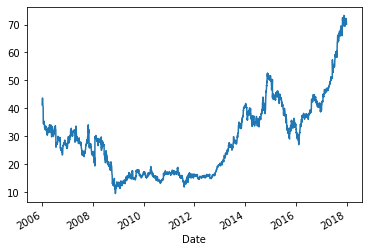

In [35]:
df['High'].plot()
plt.show()

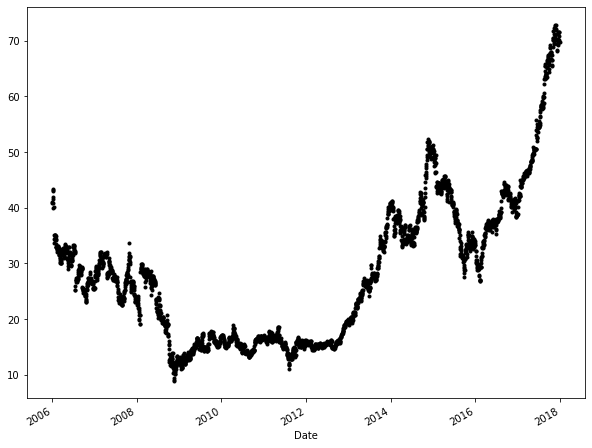

In [38]:
plt.figure(figsize=(10, 8))
df['Close'].plot(style='k.')
plt.show()

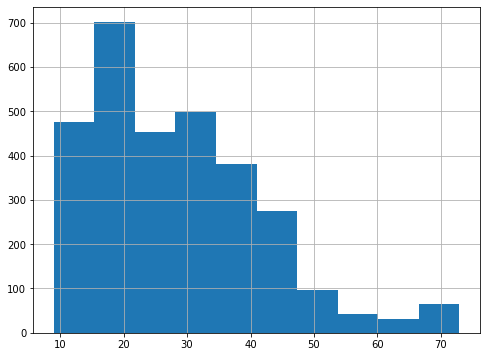

In [40]:
plt.figure(figsize=(8, 6))
df['Close'].hist()
plt.show()

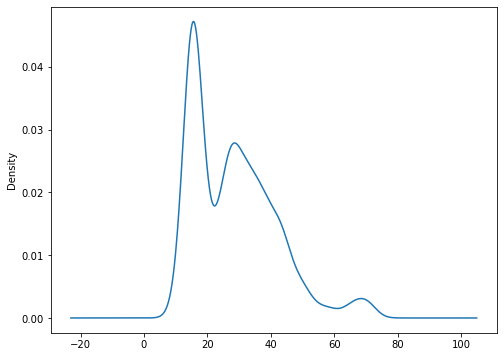

In [42]:
plt.figure(figsize=(8, 6))
df['Close'].plot(kind = 'kde')
plt.show()

<AxesSubplot:xlabel='Date'>

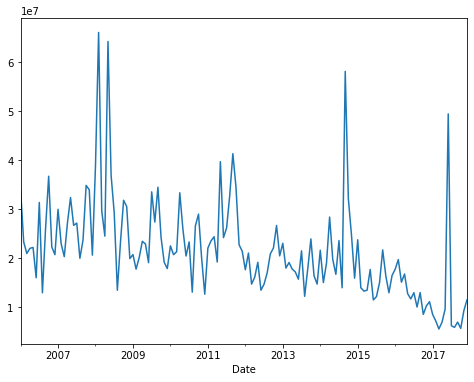

In [229]:
df_month = df.resample("M").mean()
df_month['Volume'].plot(figsize=(8, 6))

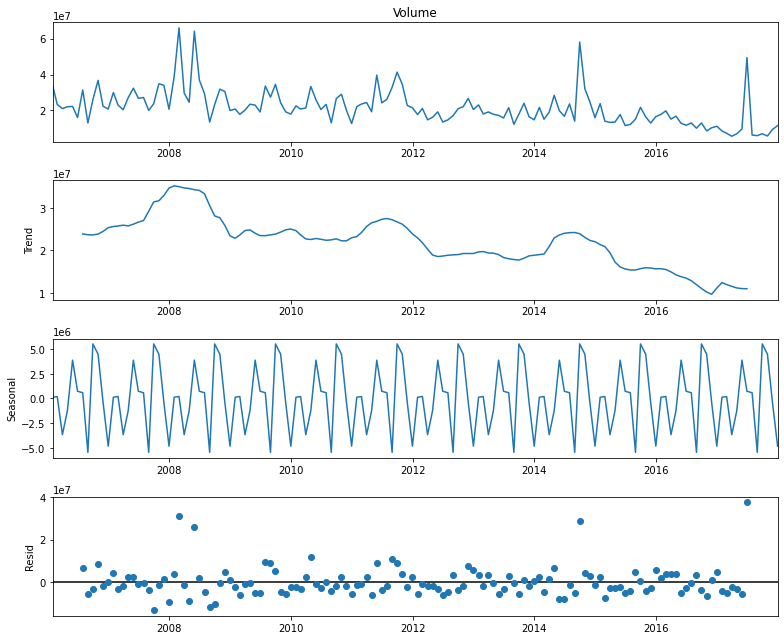

In [50]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['Volume'], model='Additive')
fig = decomposition.plot()
plt.show()

In [230]:
df_week = df.resample("W").mean()

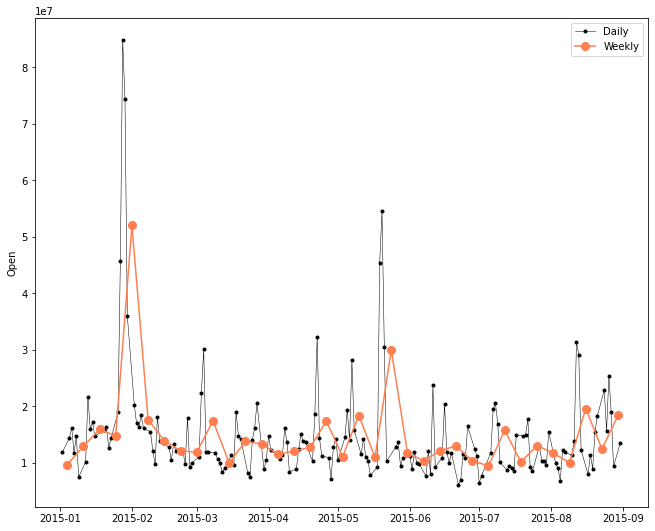

In [231]:
start, end = '2015-01', '2015-08'
fig, ax = plt.subplots()

ax.plot(df.loc[start:end, 'Volume'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
#ax.plot(df_month.loc[start:end, 'Open'], linestyle='-', label='Monthly', color='violet')
ax.set_ylabel("Open")
ax.legend()

In [270]:
df['Month'] = pd.DatetimeIndex(df.index).month

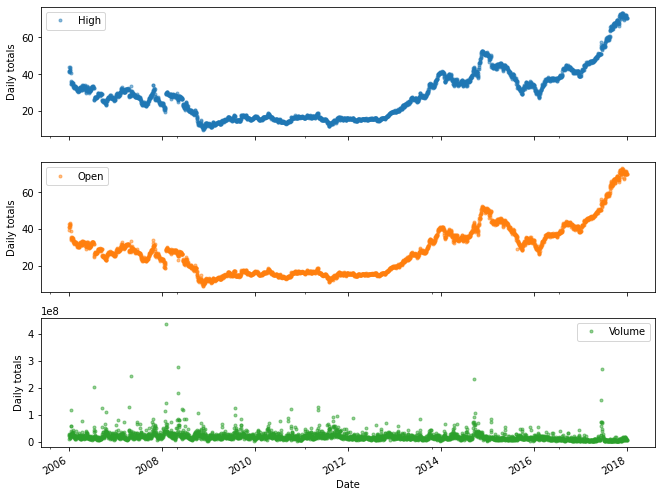

In [69]:
cols = ['High', 'Open', "Volume"]
axes = df[cols].plot(marker='.', alpha=0.5, linestyle='None', figsize = (11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel("Daily totals")

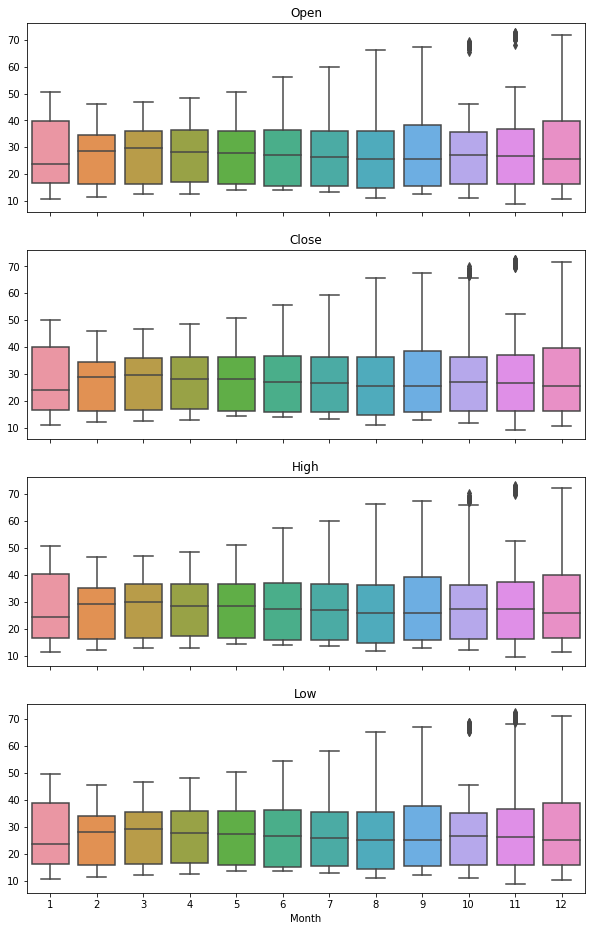

In [282]:
import seaborn as sns
#start, end = '2016-01', '2016-12'
fig, axes = plt.subplots(4, 1, figsize=(10, 16), sharex=True)
for name, ax in zip(['Open', 'Close', 'High', 'Low'], axes):
    sns.boxplot(data = df, x='Month', y=name, ax=ax)
    ax.set_ylabel("")
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

In [283]:
df_month.head()

,Open,High,Low,Close,Volume,pct_change
Date,,,,,,
2006-01-31,38.245500,38.694000,37.641500,38.113000,3.400594e+07,-1.911555
2006-02-28,33.141579,33.436842,32.627368,32.975789,2.329848e+07,-2.076970
2006-03-31,31.333478,31.696957,30.929130,31.218696,2.095522e+07,-0.493523
2006-04-30,32.383684,32.790000,31.914737,32.283158,2.200768e+07,NaN
2006-05-31,31.744545,32.175455,31.171364,31.517273,2.218047e+07,-1.281250


Text(0, 0.5, 'Month Total')

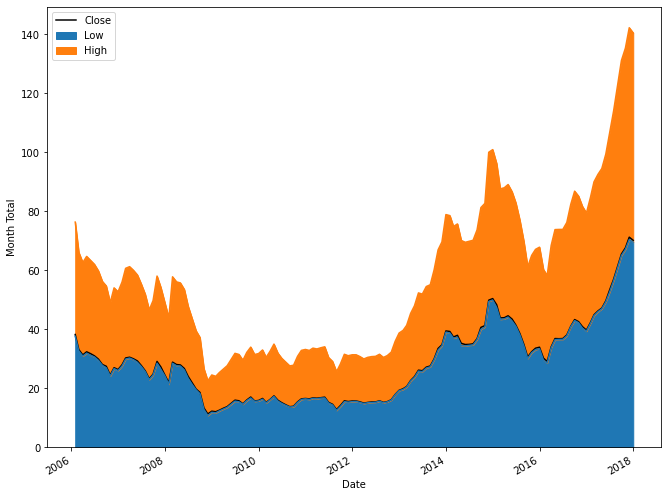

In [84]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(df_month['Open'], color='black', linewidth = 1.5, label = 'Close')
df_month[['Low', "High"]].plot.area(ax=ax)
#date_form = DateFormatter("%m-%y")
#ax.xaxis.set_major_formatter(date_form)
#ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.legend()
ax.set_ylabel("Month Total")

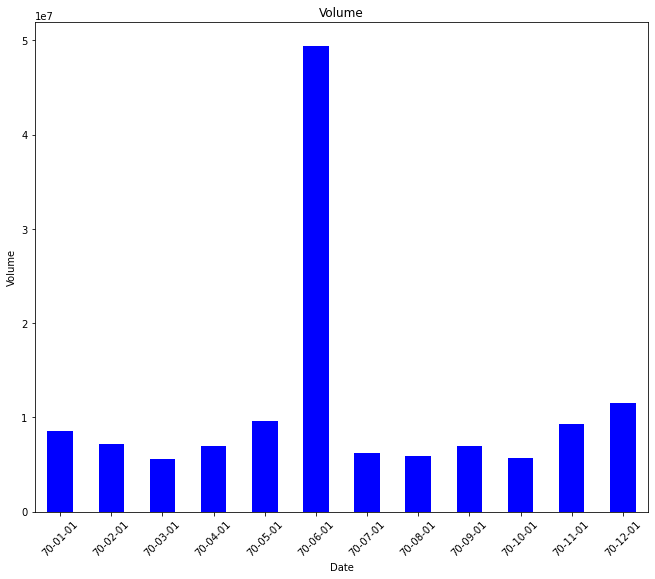

In [285]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
fig,ax = plt.subplots()
df_month.loc['2017', "Volume"].plot.bar(color='blue', ax=ax)
ax.set_ylabel("Volume")
ax.set_title("Volume")
date_form = DateFormatter("%y-%m")
ax.xaxis.set_major_formatter(date_form)

plt.xticks(rotation=45)
plt.show()

<BarContainer object of 12 artists>

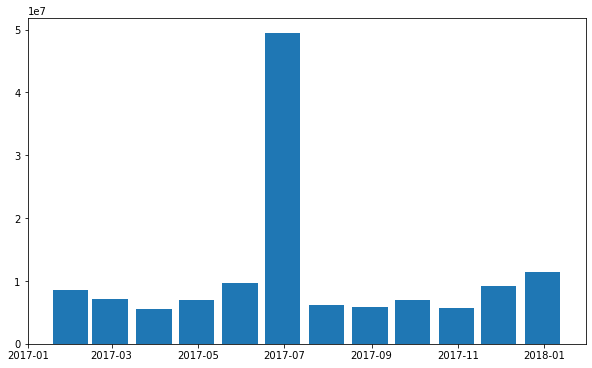

In [302]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(df_month['2017'].index, df_month.loc['2017', "Volume"], width=25, align='center')

<BarContainer object of 24 artists>

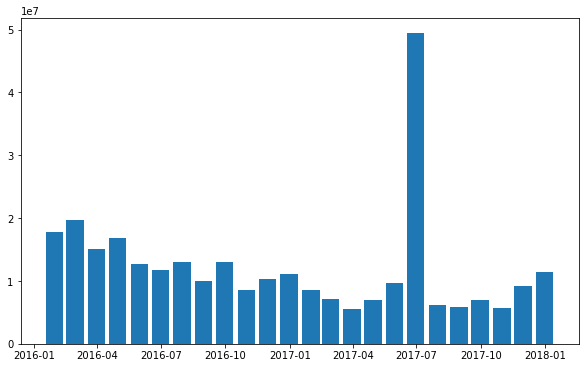

In [304]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(df_month['2016':].index, df_month.loc['2016':, "Volume"], width=25, align='center')

In [300]:
df['2017'].index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [232]:
df_7d_rolling = df.rolling(7, center=True).mean()

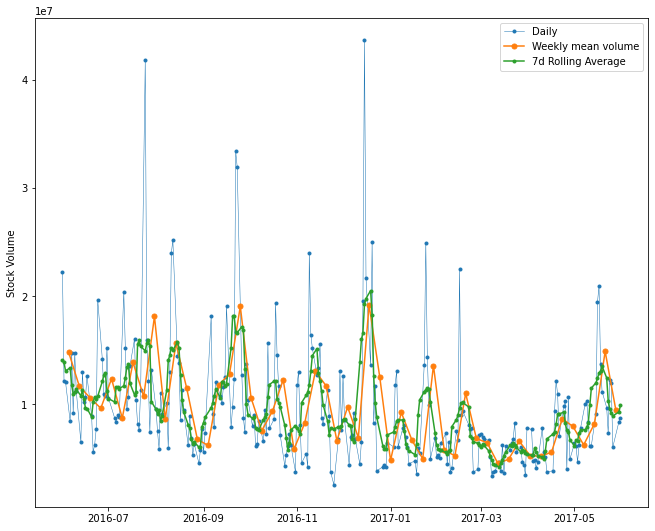

In [126]:
start, end = '2016-06', '2017-05'

fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Volume'], marker='.', linestyle='-', 
        linewidth=0.5, label='Daily')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=5, 
        linestyle='-', label = 'Weekly mean volume')
ax.plot(df_7d_rolling.loc[start:end, 'Volume'], marker='.', linestyle='-', label='7d Rolling Average')
ax.set_ylabel('Stock Volume')
ax.legend()

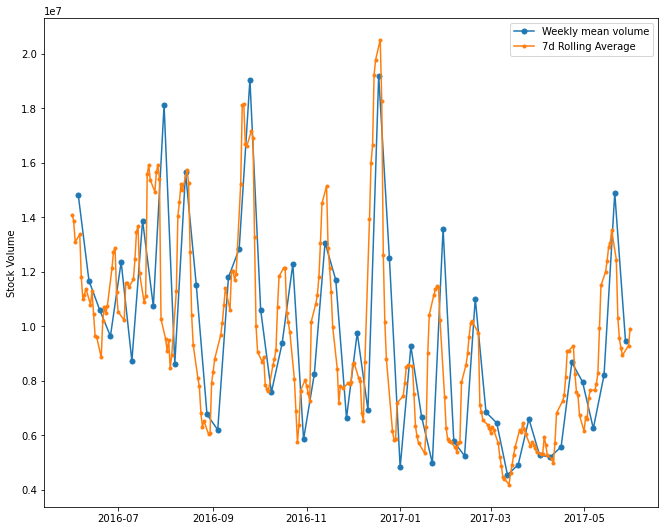

In [233]:
start, end = '2016-06', '2017-05'

fig, ax = plt.subplots()
#ax.plot(df.loc[start:end, 'Volume'], marker='.', linestyle='-', 
        #linewidth=0.5, label='Daily')
ax.plot(df_week.loc[start:end, 'Volume'], marker='o', markersize=5, 
        linestyle='-', label = 'Weekly mean volume')
ax.plot(df_7d_rolling.loc[start:end, 'Volume'], marker='.', linestyle='-', label='7d Rolling Average')
ax.set_ylabel('Stock Volume')
ax.legend()

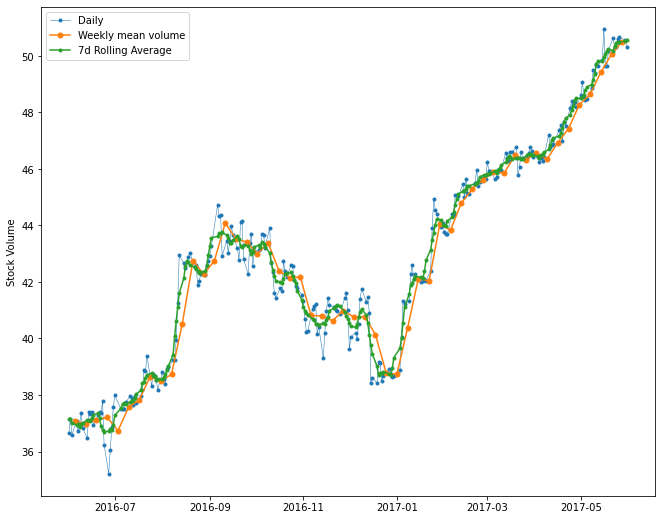

In [127]:
start, end = '2016-06', '2017-05'

fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Close'], marker='.', linestyle='-', 
        linewidth=0.5, label='Daily')
ax.plot(df_week.loc[start:end, 'Close'], marker='o', markersize=5, 
        linestyle='-', label = 'Weekly mean volume')
ax.plot(df_7d_rolling.loc[start:end, 'Close'], marker='.', linestyle='-', label='7d Rolling Average')
ax.set_ylabel('Stock Volume')
ax.legend()

In [132]:
df_365d_rolling = df.rolling(365, center=True).mean()
df_30d_rolling = df.rolling(30, center=True).mean()

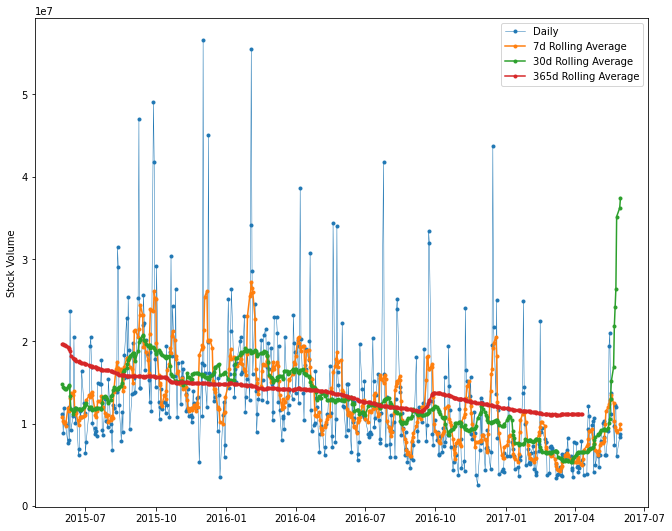

In [133]:
start, end = '2015-06', '2017-05'

fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Volume'], marker='.', linestyle='-', 
        linewidth=0.5, label='Daily')
ax.plot(df_7d_rolling.loc[start:end, 'Volume'], marker='.', linestyle='-', label='7d Rolling Average')
ax.plot(df_30d_rolling.loc[start:end, 'Volume'], marker='.', linestyle='-', label='30d Rolling Average')
ax.plot(df_365d_rolling.loc[start:end, 'Volume'], marker='.', linestyle='-', label='365d Rolling Average')
ax.set_ylabel('Stock Volume')
ax.legend()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

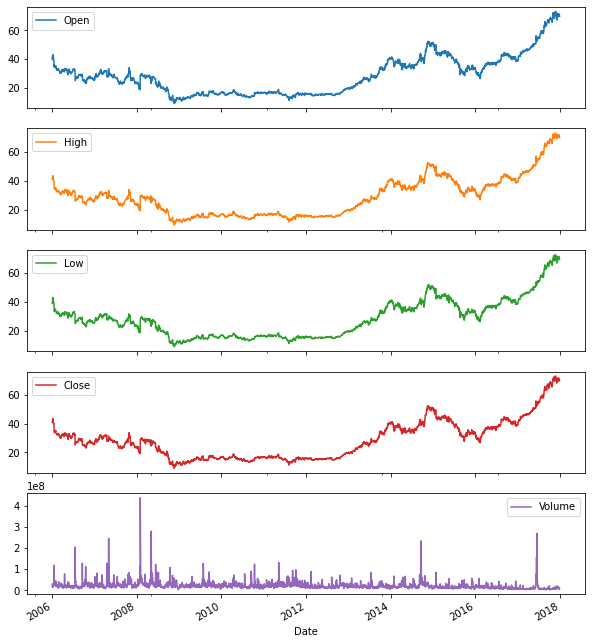

In [234]:
df.plot(subplots=True, figsize=(10,12))
#plt.title('Google stock attributes from 2008 to 2010')
#plt.show()

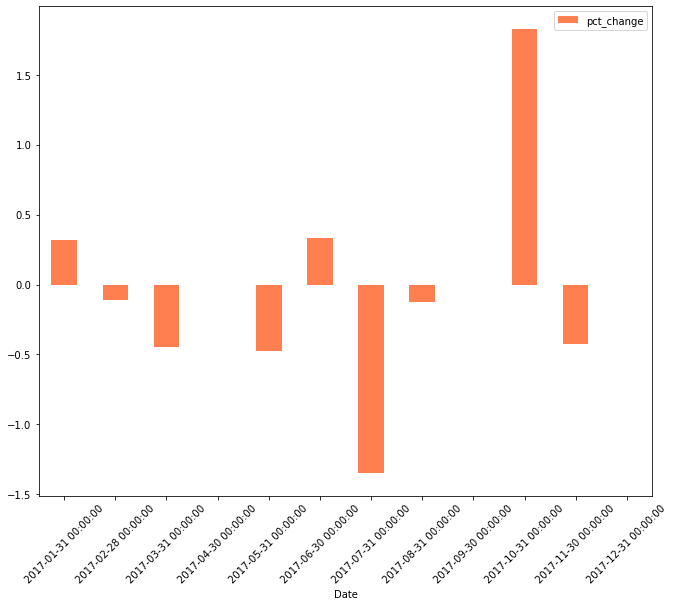

In [140]:
df_month.loc[:, 'pct_change'] = df.Close.pct_change()*100
fig, ax = plt.subplots()
df_month.loc['2017-01':'2017-12', 'pct_change' ].plot(kind='bar', color='coral', ax=ax)
#ax.xaxis.set_major_locator(mdates.MonthLocator())
#date_form = DateFormatter("%m-%y")
#ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45)
ax.legend()

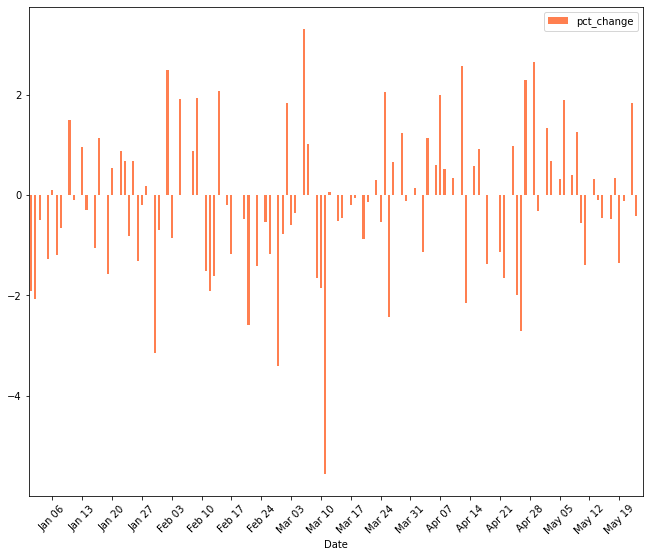

In [240]:
df_month.loc[:, 'pct_change'] = df.Close.pct_change()*100

fig, ax = plt.subplots()
df_month['pct_change' ].plot(kind='bar', color='coral', ax=ax)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)
ax.legend()

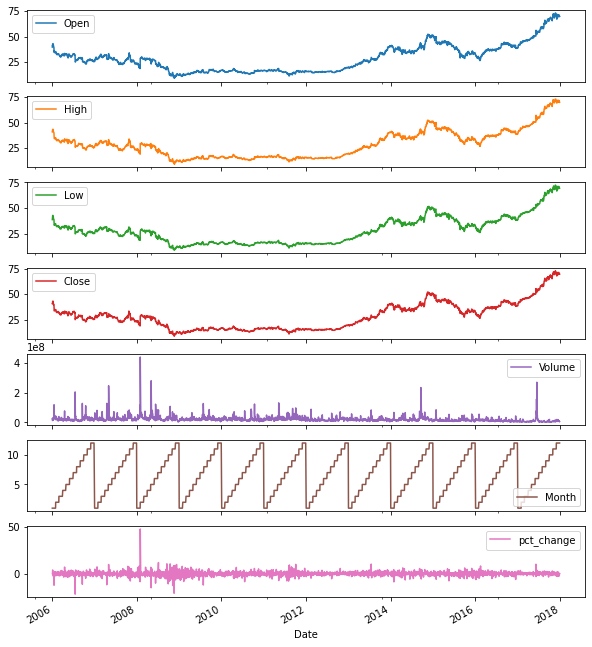

In [137]:
df.plot(subplots=True, figsize=(10,12))
#plt.title('Google stock attributes from 2008 to 2010')
plt.show()

<AxesSubplot:xlabel='Date'>

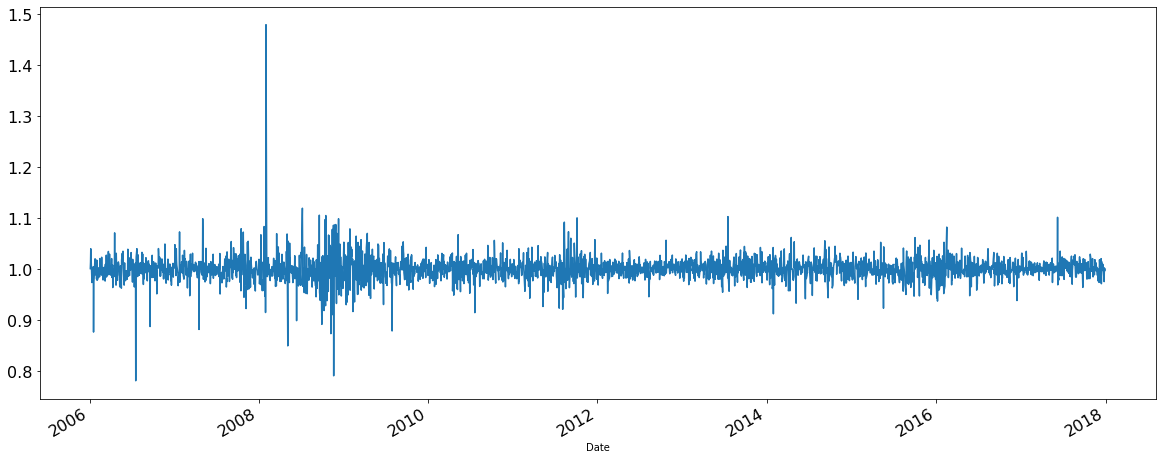

In [253]:
df['Change'] = df.Close.div(df.Close.shift())
df['Change'].plot(figsize=(20, 8), fontsize = 16)

<AxesSubplot:xlabel='Date'>

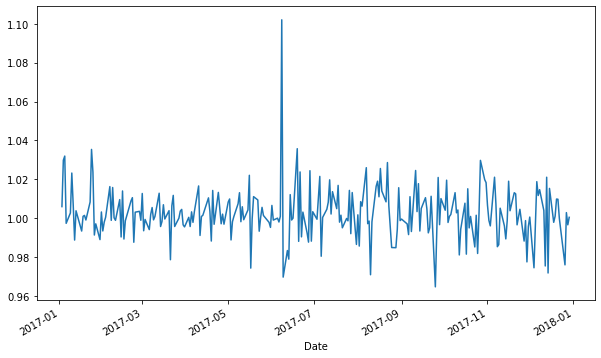

In [250]:
df['2017']['Change'].plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

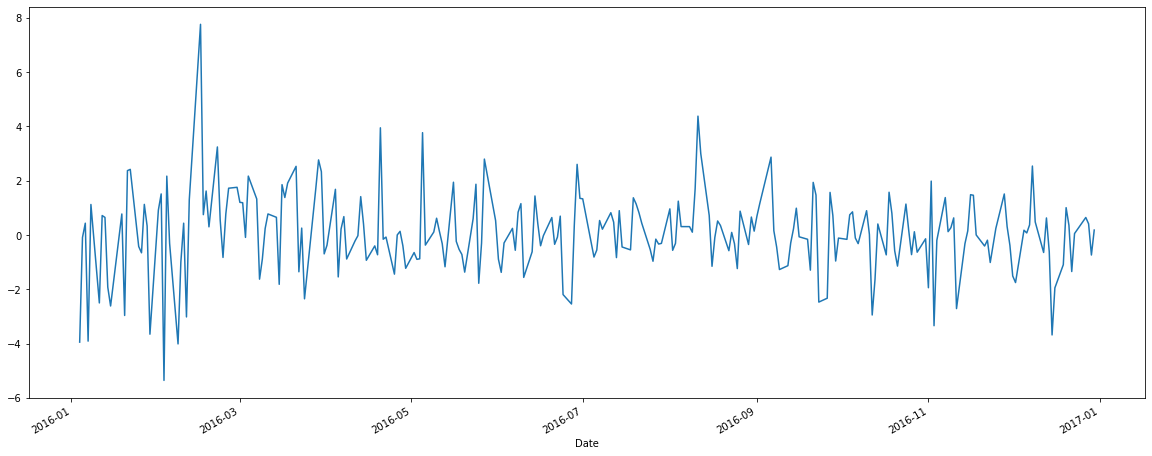

In [150]:
df['Return'] = df.Change.sub(1).mul(100)
df['2016']['Return'].plot(figsize=(20, 8))

<AxesSubplot:xlabel='Date'>

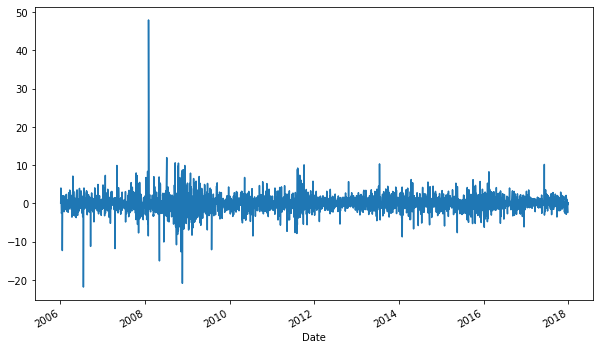

In [241]:
df.Close.pct_change().mul(100).plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

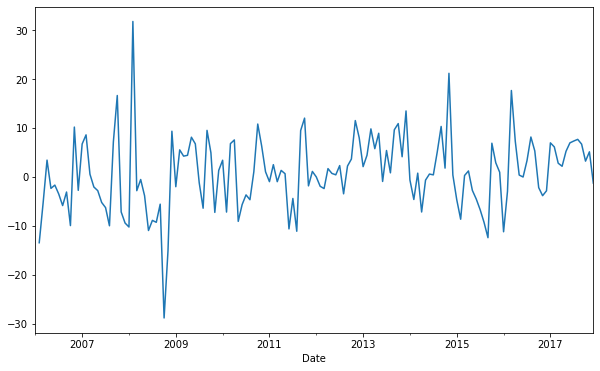

In [242]:
df_month.Close.pct_change().mul(100).plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

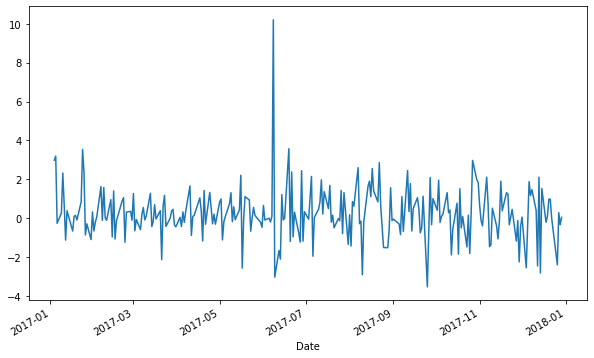

In [243]:
df['2017'].Close.pct_change().mul(100).plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

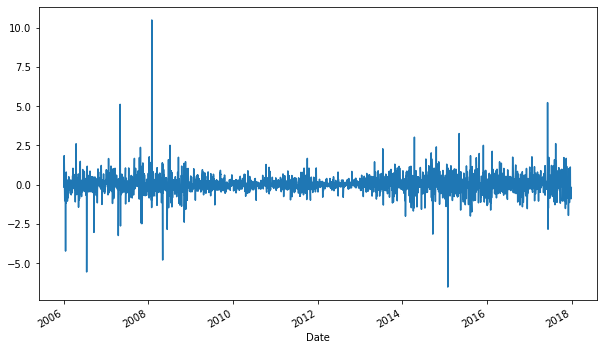

In [154]:
df.High.diff().plot(figsize=(10, 6))

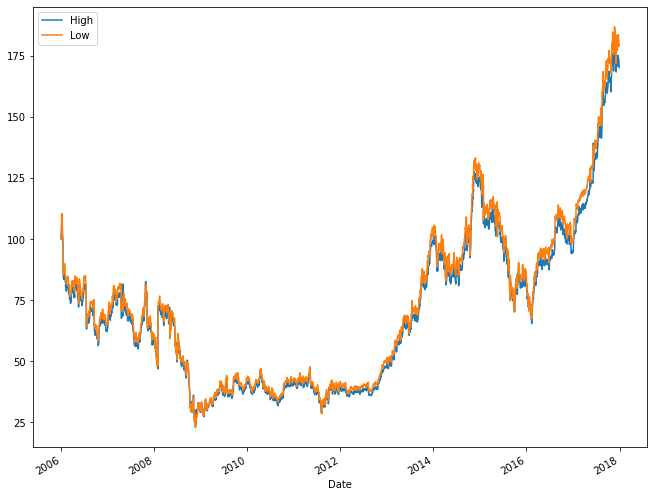

In [164]:
fig, ax = plt.subplots()
ax = df.High.div(df.High.iloc[0]).mul(100).plot(label = "High")
ax = df.Low.div(df.Low.iloc[0]).mul(100).plot(label='Low')
ax.legend()

In [248]:
df.High.iloc[0]

41.22

In [245]:
df5 = pd.DataFrame({'angles': [0, 3, 4],
                   'degrees': [360, 180, 360]},
                  index=['circle', 'triangle', 'rectangle'])
df5

,angles,degrees
circle,0,360
triangle,3,180
rectangle,4,360


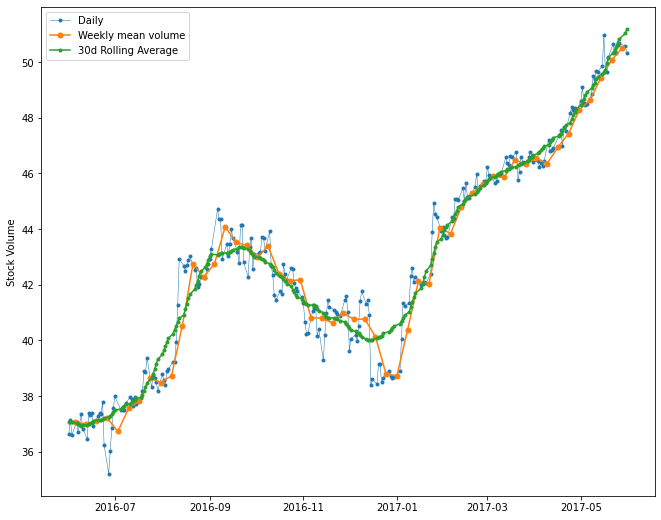

In [165]:
start, end = '2016-06', '2017-05'

fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Close'], marker='.', linestyle='-', 
        linewidth=0.5, label='Daily')
ax.plot(df_week.loc[start:end, 'Close'], marker='o', markersize=5, 
        linestyle='-', label = 'Weekly mean volume')
ax.plot(df_30d_rolling.loc[start:end, 'Close'], marker='.', linestyle='-', label='30d Rolling Average')
ax.set_ylabel('Stock Volume')
ax.legend()

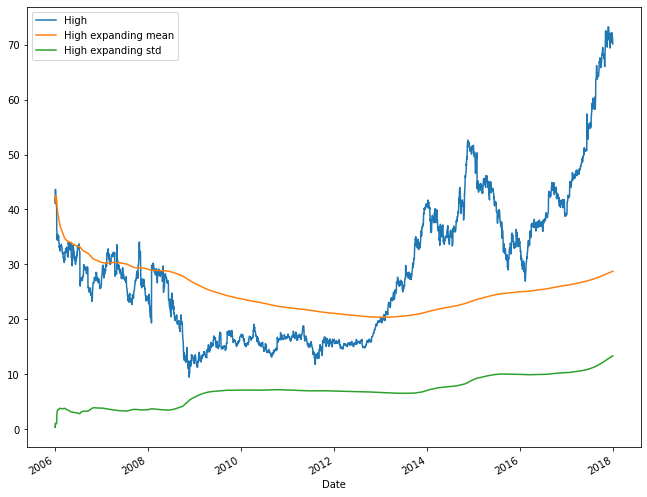

In [168]:
fig, ax = plt.subplots()
ax = df.High.plot(label='High')
ax = df.High.expanding().mean().plot(label='High expanding mean')
ax = df.High.expanding().std().plot(label='High expanding std')
ax.legend()

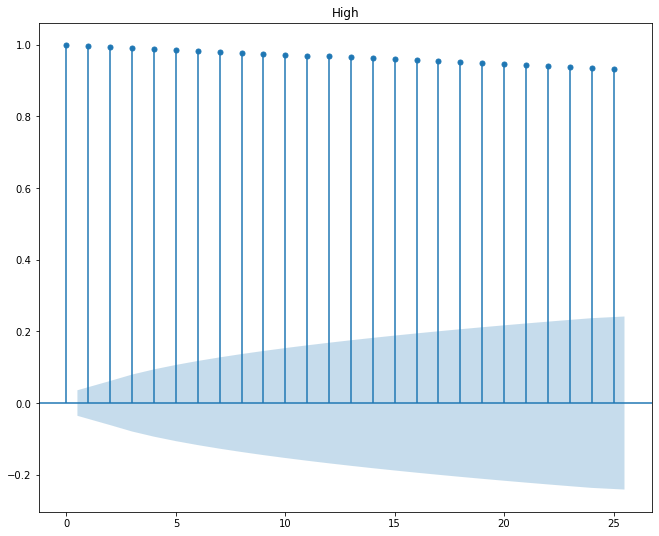

In [173]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df["High"],lags=25,title="High")
plt.show()

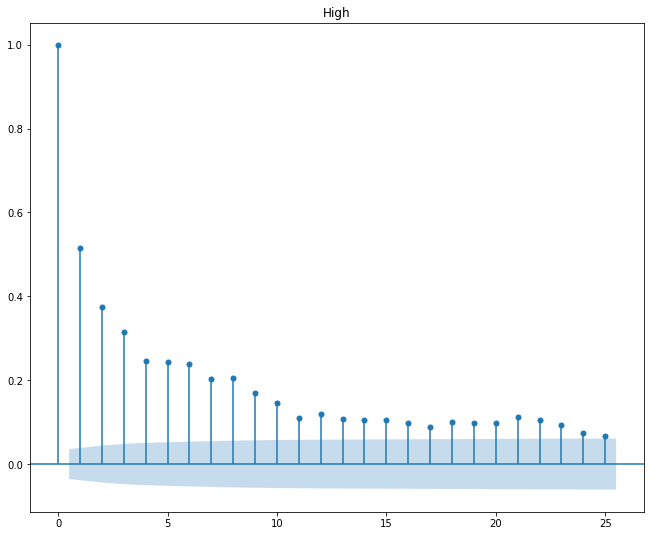

In [174]:
plot_acf(df["Volume"],lags=25,title="High")
plt.show()

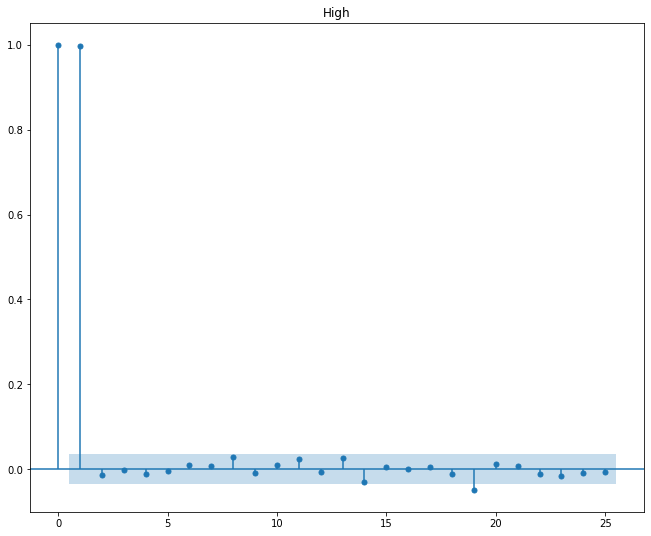

In [175]:
plot_pacf(df["High"],lags=25,title="High")
plt.show()

In [182]:
decomposed_df_volume = sm.tsa.seasonal_decompose(df["High"],freq=365) # The frequncy is annual

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

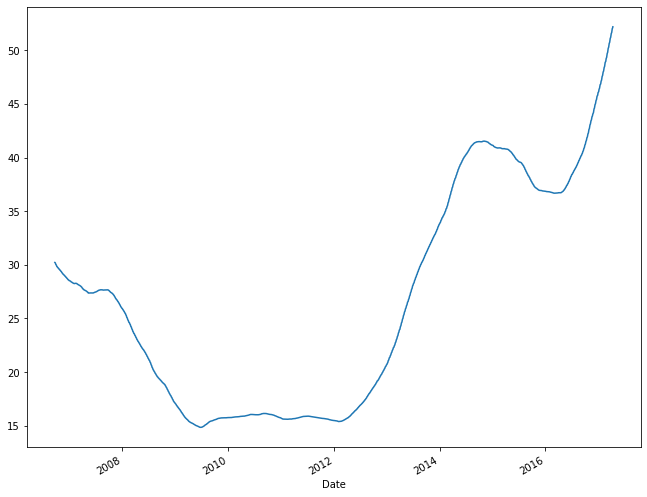

In [183]:
decomposed_df_volume.trend.plot()

In [184]:
decomposed_df_volume = sm.tsa.seasonal_decompose(df["Volume"],freq=365) 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

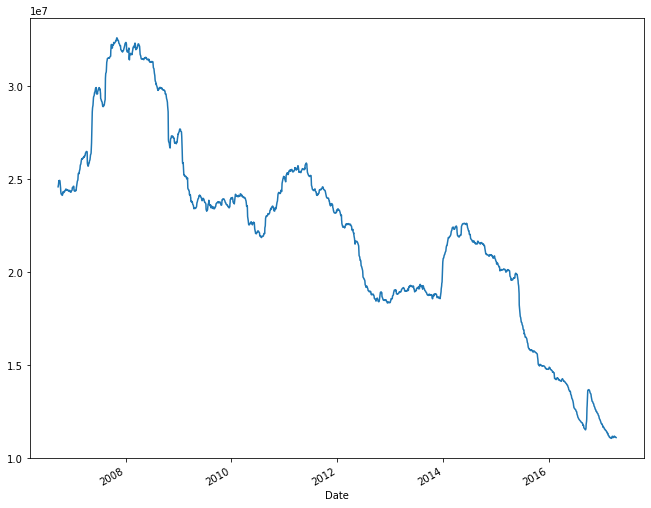

In [185]:
decomposed_df_volume.trend.plot()

<AxesSubplot:xlabel='Date'>

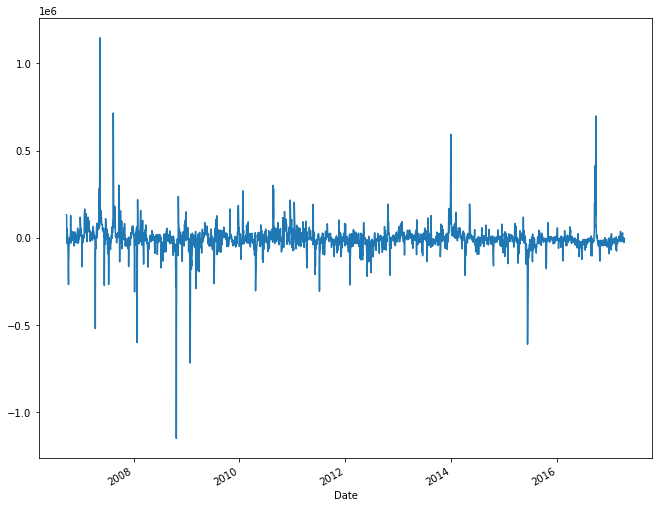

In [186]:
decomposed_df_volume.trend.diff().plot()

In [200]:
df['month'] = df.index.month
df['year'] = df.index.year
df['day'] = df.index.day
df['weekdayName'] = pd.DatetimeIndex(df.index).to_series().dt.day_name() # df.date.dt.day_name()
df['weekday'] = df.index.weekday
df['week'] = df.index.week
df['weekend'] = df.index.weekday 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [201]:
df

,Open,High,Low,Close,Volume,Name,Month,pct_change,Change,Return,month,year,day,weekdayName,weekday,week,weekend
Date,,,,,,,,,,,,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA,1,NaN,NaN,NaN,1,2006,3,Tuesday,1,1,1
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA,1,0.146663,1.016497,1.649685,1,2006,4,Wednesday,2,1,2
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA,1,1.366854,0.995943,-0.405728,1,2006,5,Thursday,3,1,3
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA,1,4.045268,1.044093,4.409298,1,2006,6,Friday,4,1,4
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA,1,0.485999,1.002066,0.206564,1,2006,9,Monday,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA,12,-0.013968,0.995843,-0.415685,12,2017,22,Friday,4,51,4
2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA,12,-2.402906,0.993321,-0.667873,12,2017,26,Tuesday,1,52,1
2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA,12,0.286287,0.987393,-1.260681,12,2017,27,Wednesday,2,52,2


In [222]:
import calendar
all_month_year_df = pd.pivot_table(df, values="Open",
                                   index=["month"],
                                   columns=["year"],
                                   fill_value=0,
                                   margins=True)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]] # name months
all_month_year_df = all_month_year_df.set_index(named_index)
all_month_year_df

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,All
Jan,38.245500,27.990500,21.926667,12.084500,16.572105,16.441000,15.719500,19.866667,39.268571,48.310500,30.250526,42.256000,27.439336
Feb,33.141579,30.297368,28.884000,12.601053,15.252632,16.778421,15.445500,20.623684,37.397895,43.861579,29.107000,44.916316,27.321515
Mar,31.333478,30.549545,28.070000,13.255455,16.256087,16.663043,14.986818,22.673000,37.975238,43.929091,34.064545,46.230870,27.995209
Apr,32.383684,30.021000,27.930000,13.802381,17.462500,16.853500,15.231500,23.988636,35.254762,44.590476,36.873810,47.207895,28.401504
May,31.744545,29.288182,26.731905,14.903000,15.965000,17.020476,15.405000,26.160455,34.852857,43.475500,36.822381,49.645909,28.583543
Jun,31.005455,27.749524,24.046667,16.000000,15.136364,15.255000,15.405238,25.972500,34.901429,41.403182,36.883636,53.327727,28.146744
Jul,29.893500,25.954286,21.922273,15.792273,14.435714,14.597000,15.781429,27.197273,35.087273,38.580455,38.095500,56.966000,27.744625
Aug,28.064348,23.283043,19.750952,14.764286,13.790000,12.814348,15.244783,27.579545,36.836190,34.921429,41.082174,61.336522,27.533233
Sep,27.481000,24.784737,18.612857,16.067143,13.946190,14.174762,15.511053,29.986000,40.662857,30.651905,43.306190,65.530000,28.373143
Oct,24.528636,29.123913,13.361739,17.060909,15.419524,15.786190,16.151429,33.518696,41.253043,32.425000,42.594286,67.611364,29.172992


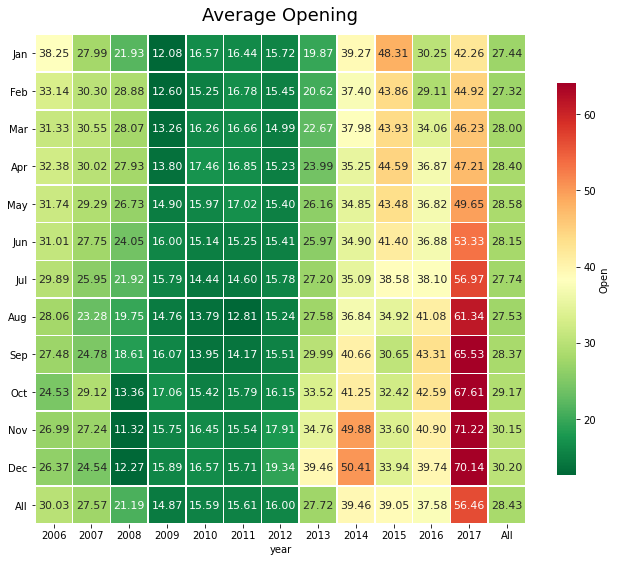

In [223]:
#df= df.drop(['pct_change', 'Change', 'Return'], axis=1)
#df = df[df.columns].astype(float)
ax = sns.heatmap(all_month_year_df, cmap='RdYlGn_r', robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'Open'})                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Average Opening', fontdict={'fontsize':18},    pad=14);